## Final Project

# Traffic Sign Recognition System with Autoencoders and CNNs

#### by
#### Sunil Yanaganadula (U82205360)
#### Kumara Swamy Padigeri (U45008503)

### Introduction:
An essential component of driver assistance systems and autonomous cars is the ability to recognize traffic signs. But existing systems face difficulties in difficult environments such as dim lighting, changing weather, and occlusions. These elements raise the possibility of accidents by causing signs to be missed or misconstrued. In order to improve accuracy and resilience, this research suggests a revolutionary traffic sign recognition system that combines autoencoders and convolutional neural networks (CNNs). Deep learning approaches will greatly enhance the recognition and detection of signs, resulting in safer and more effective transportation.

In [2]:
#import necessary libraries

import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

np.random.seed(1)
tf.random.set_seed(1)

### Dataset:
The dataset from the INI Benchmark Website, collected in the year 2011, which is accessible to the public at https://benchmark.ini.rub.de/, will be used to train the system. The Institute of Neural Information (INI) has put together this dataset, which contains a large range of images of traffic signs taken in a variety of settings, such as different lighting, weather, and traffic congestion. The collection consists of Portable Pixmap (PPM) format images that have been uniquely identified by track and running number labels. The data includes 43 unique classes that correspond to various traffic signs. The target variable in this dataset is the traffic sign category. The datasets on the website have already been divided into train and test datasets. Since separating the train and validation datasets is one of the concepts we learned from the course, we have used the training dataset, which we view as our final dataset, to demonstrate this process in our project.

#### Let's first load the data to look at the different traffic sings we have and the number of images present under each class.

In [3]:
data = os.listdir('/Users/sunilinus/Desktop/DSP/Project/GTSRB/Final_Training/Images')

In [4]:
#lets look at the traffic signs we have the in the directory

for sign in data:
    print(sign)

maximum_speed limit_20
end_of_all_restrictions
maximum_speed limit_80
no_passing
traffic_signals
general_danger
.DS_Store
end_of_no_passing_zone
pass_on_the_right
roundabout
no_passing_for_vehicles_over_3.5_tonnes
cycle
straight_ahead
maximum_speed limit_50
maximum_speed limit_100
stop
end_of_no_passing_zone_for_trucks
uneven_road
maximum_speed limit_60
do_not_enter
slipperiness
left_curve
maximum_speed limit_70
maximum_speed limit_120
pass_on_the_left
end_speed_limit_80
slipperiness_due_to_snow_or_ice
pedestrian
vehicles_over_3.5_tonnes_prohibited
yield
right_ahead
priority_road
straight_ahead_or_right_ahead
roadworks
left_double_curve
priority
one_sided_road_narrowing_(right)
children
right_curve
left_ahead
wild_animals
maximum_speed limit_30
road_closed
straight_ahead _or_left_ahead


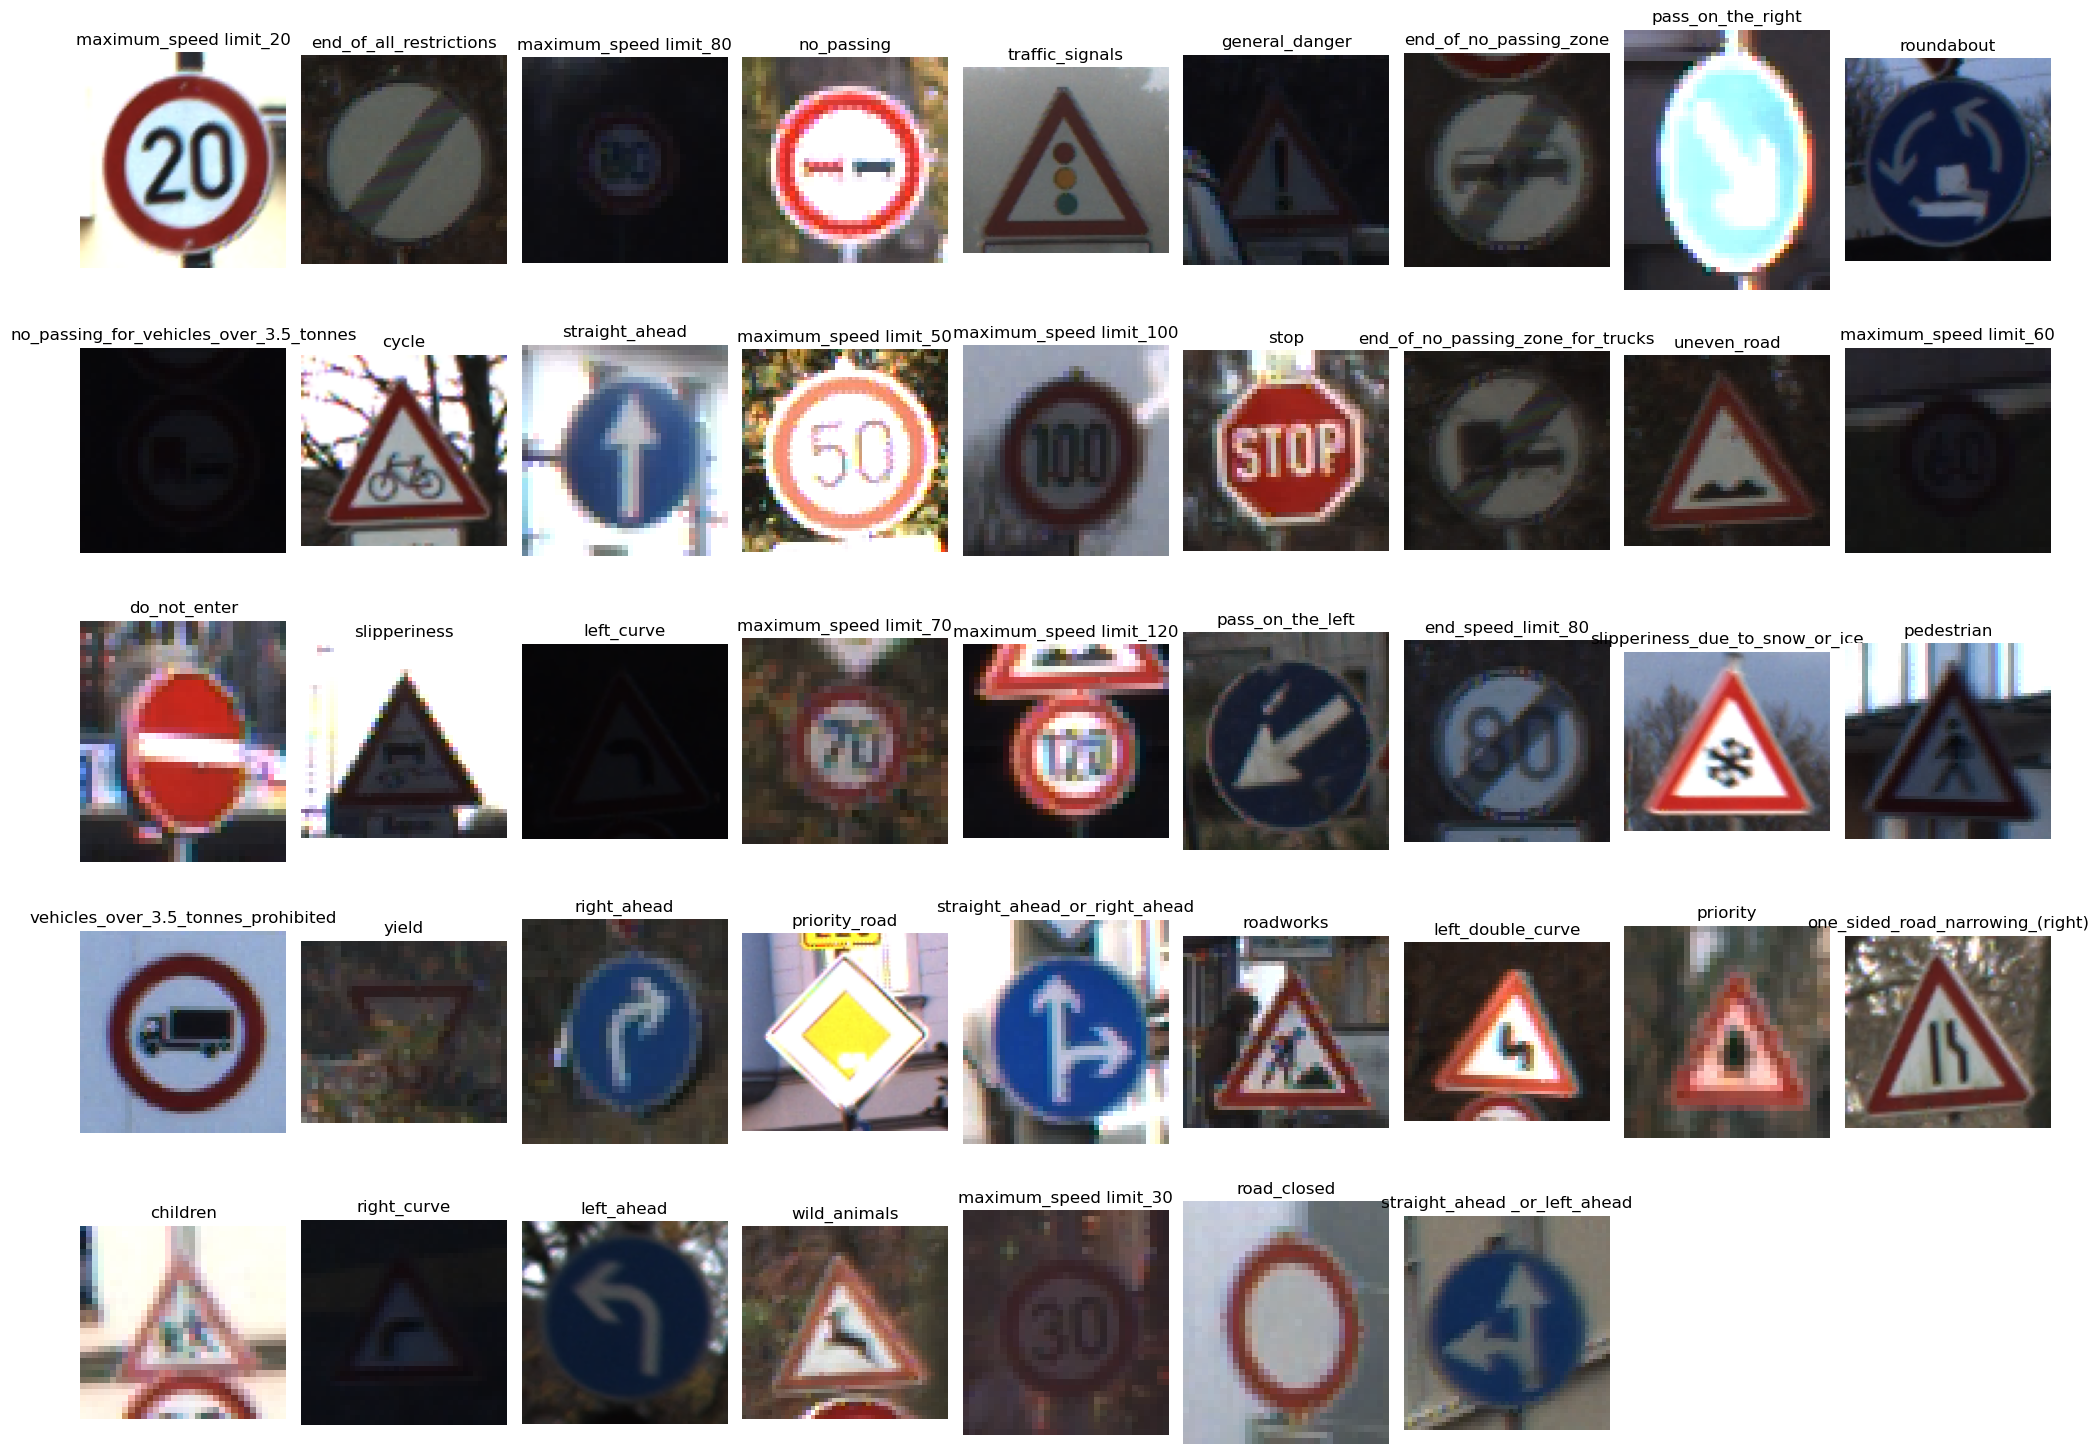

In [7]:
# Path to the directory containing the images
data_dir = '/Users/sunilinus/Desktop/DSP/Project/GTSRB/Final_Training/Images'

# Get the list of subdirectories (classes)
classes = [class_name for class_name in os.listdir(data_dir) if class_name != '.DS_Store']

# Display one image from each class
plt.figure(figsize=(20, 15))

for i, class_name in enumerate(classes, start=1):
    # Get the list of images in the current class
    class_dir = os.path.join(data_dir, class_name)
    images = [img for img in os.listdir(class_dir) if img != '.DS_Store']
    
    # Load and display one image from the class
    image_path = os.path.join(class_dir, images[0])  # Select the first image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    plt.subplot(5, 9, i)  # Adjust this based on the number of classes
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Lets look at the number of images present in each traffic sign file in the directory

In [4]:
total_images = 0

data_dir = '/Users/sunilinus/Desktop/DSP/Project/GTSRB/Final_Training/Images'

for sign in data:
    sign_dir = os.path.join(data_dir, sign)
    if os.path.isdir(sign_dir):
        images = os.listdir(sign_dir)
        num_images = len(images)
        total_images += num_images
        print(f"{sign} : {num_images}")
print(f"Total number of images: {total_images}")

maximum_speed limit_20 : 211
end_of_all_restrictions : 241
maximum_speed limit_80 : 1861
no_passing : 1471
traffic_signals : 601
general_danger : 1201
end_of_no_passing_zone : 241
pass_on_the_right : 2071
roundabout : 361
no_passing_for_vehicles_over_3.5_tonnes : 2011
cycle : 271
straight_ahead : 1201
maximum_speed limit_50 : 2251
maximum_speed limit_100 : 1441
stop : 781
end_of_no_passing_zone_for_trucks : 241
uneven_road : 391
maximum_speed limit_60 : 1411
do_not_enter : 1111
slipperiness : 511
left_curve : 211
maximum_speed limit_70 : 1981
maximum_speed limit_120 : 1411
pass_on_the_left : 301
end_speed_limit_80 : 421
slipperiness_due_to_snow_or_ice : 451
pedestrian : 241
vehicles_over_3.5_tonnes_prohibited : 421
yield : 2161
right_ahead : 690
priority_road : 2101
straight_ahead_or_right_ahead : 391
roadworks : 1501
left_double_curve : 331
priority : 1321
one_sided_road_narrowing_(right) : 271
children : 541
right_curve : 361
left_ahead : 421
wild_animals : 781
maximum_speed limit_30

From the above results, we can see the number of images present in each traffic sign file in the directory, along with the total number of images, which is 39252 images.

#### Lets have a visualization of the above distribution

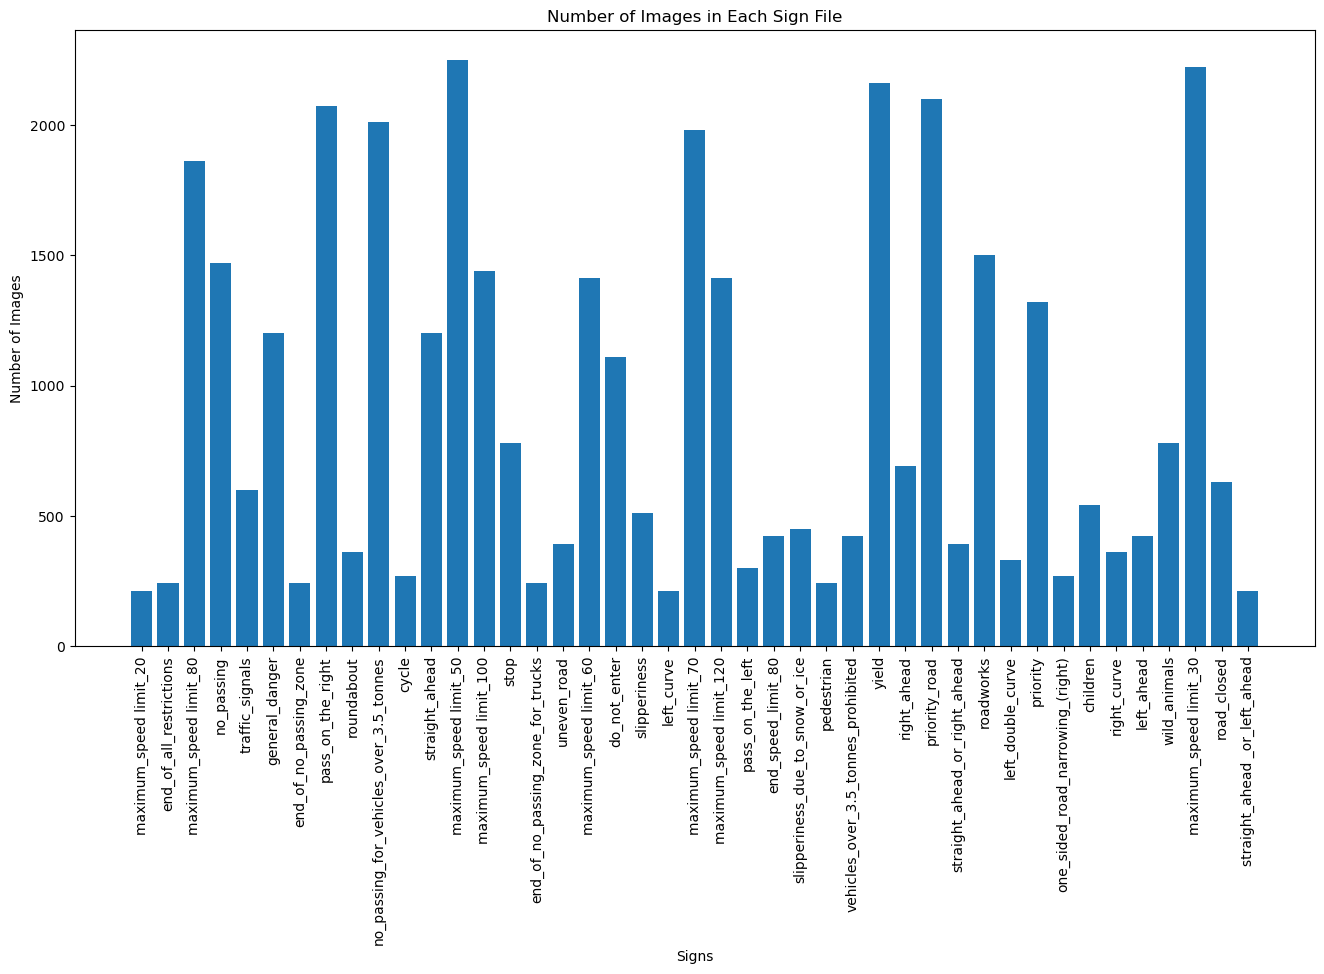

In [5]:
# Dictionary to store the number of images for each sign
sign_images_count = {}

for sign in data:
    sign_dir = os.path.join(data_dir, sign)
    if os.path.isdir(sign_dir):
        images = os.listdir(sign_dir)
        num_images = len(images)
        sign_images_count[sign] = num_images
        
# Plotting the bar graph
plt.figure(figsize=(16, 8))
plt.bar(sign_images_count.keys(), sign_images_count.values())
plt.xlabel('Signs')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Sign File')
plt.xticks(rotation=90)
plt.show()

In the below cell generators are used to load and preprocess images for training two different models: an autoencoder and a convolutional neural network (CNN).

In [6]:
# Set up data generators
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) # rescale 1./255 to normalize pixel values

train_autoencoder_generator = image_generator.flow_from_directory(
    '/Users/sunilinus/Desktop/DSP/Project/GTSRB/Final_Training/Images',
    target_size=(64, 64),
    batch_size=32,
    class_mode='input',
    shuffle=True,
    color_mode='rgb',
    subset="training")

validation_autoencoder_generator = image_generator.flow_from_directory(
    '/Users/sunilinus/Desktop/DSP/Project/GTSRB/Final_Training/Images',
    target_size=(64, 64),
    batch_size=32,
    class_mode='input',
    shuffle=False,
    color_mode='rgb',
    subset="validation")


train_cnn_generator = image_generator.flow_from_directory(
    '/Users/sunilinus/Desktop/DSP/Project/GTSRB/Final_Training/Images',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    subset="training")

validation_cnn_generator = image_generator.flow_from_directory(
    '/Users/sunilinus/Desktop/DSP/Project/GTSRB/Final_Training/Images',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb',
    subset="validation")

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.
Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


### Modeling Approach:

This project suggests a deep learning method for traffic sign recognition that combines CNNs and autoencoders. Here's a summary of the reasoning:

● Autoencoders: Autoencoders can be especially useful in this application, as they can pick up accurate representations of traffic signs even in the face of changing lighting, occlusions, or weather, Through the process of autoencoder training, the model we expect that the model will be able to identify key characteristics that are less vulnerable to perturbations in the surrounding environment while reconstructing the sign images.

● Convolutional Neural Networks (CNNs): CNNs perform exceptionally well in image recognition tasks as they can extract spatial features from image input. In this project, the extracted features from the autoencoder will be classified into the appropriate traffic sign categories using a CNN.
There will need to be some preliminary processing done before the data is fed into the model. In order to ensure that the model receives consistent and high-quality input, this could involve image resizing, normalization, and possibly noise reduction techniques.

### Building the Autoencoder:

Our purpose here to train the Autoencoder is that we expect that the model will be able to identify key characteristics that are less vulnerable to perturbations in the surrounding environment while reconstructing the sign images.

In [7]:
# Build the autoencoder
input_img = Input(shape=(64, 64, 3))
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Get summary
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_autoencoder_generator,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=validation_autoencoder_generator,
    callbacks=[early_stop]
)

Epoch 1/100
  1/981 ━━━━━━━━━━━━━━━━━━━━ 13:22 819ms/step - loss: 0.6930

/Users/sunilinus/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - loss: 0.5208 - val_loss: 0.4845
Epoch 2/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - loss: 0.4777 - val_loss: 0.4797
Epoch 3/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - loss: 0.4728 - val_loss: 0.4758
Epoch 4/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - loss: 0.4705 - val_loss: 0.4738
Epoch 5/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - loss: 0.4685 - val_loss: 0.4732
Epoch 6/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - loss: 0.4683 - val_loss: 0.4721
Epoch 7/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - loss: 0.4679 - val_loss: 0.4714
Epoch 8/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - loss: 0.4668 - val_loss: 0.4710
Epoch 9/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - loss: 0.4667 - val_loss: 0.4706
Epoch 10/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - loss: 0.4664 - val_loss: 0.4703
Epoch 11/100
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - loss: 0.4651 - val_loss: 0.4698
Epoch 12/100
981/981 ━━━━━━━━━━

The loss did not decrease for 3 consecutive epochs, hence the training was stopped at epoch 63.

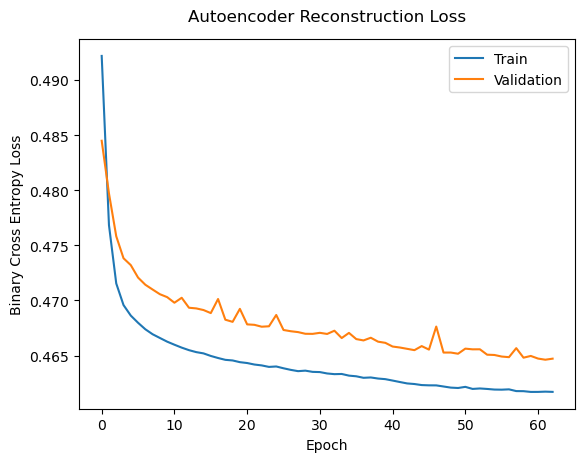

In [9]:
# Plot training and validation loss scores
# against the number of epochs.

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Displaying the reconstructed images of a few randomly selected classes.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


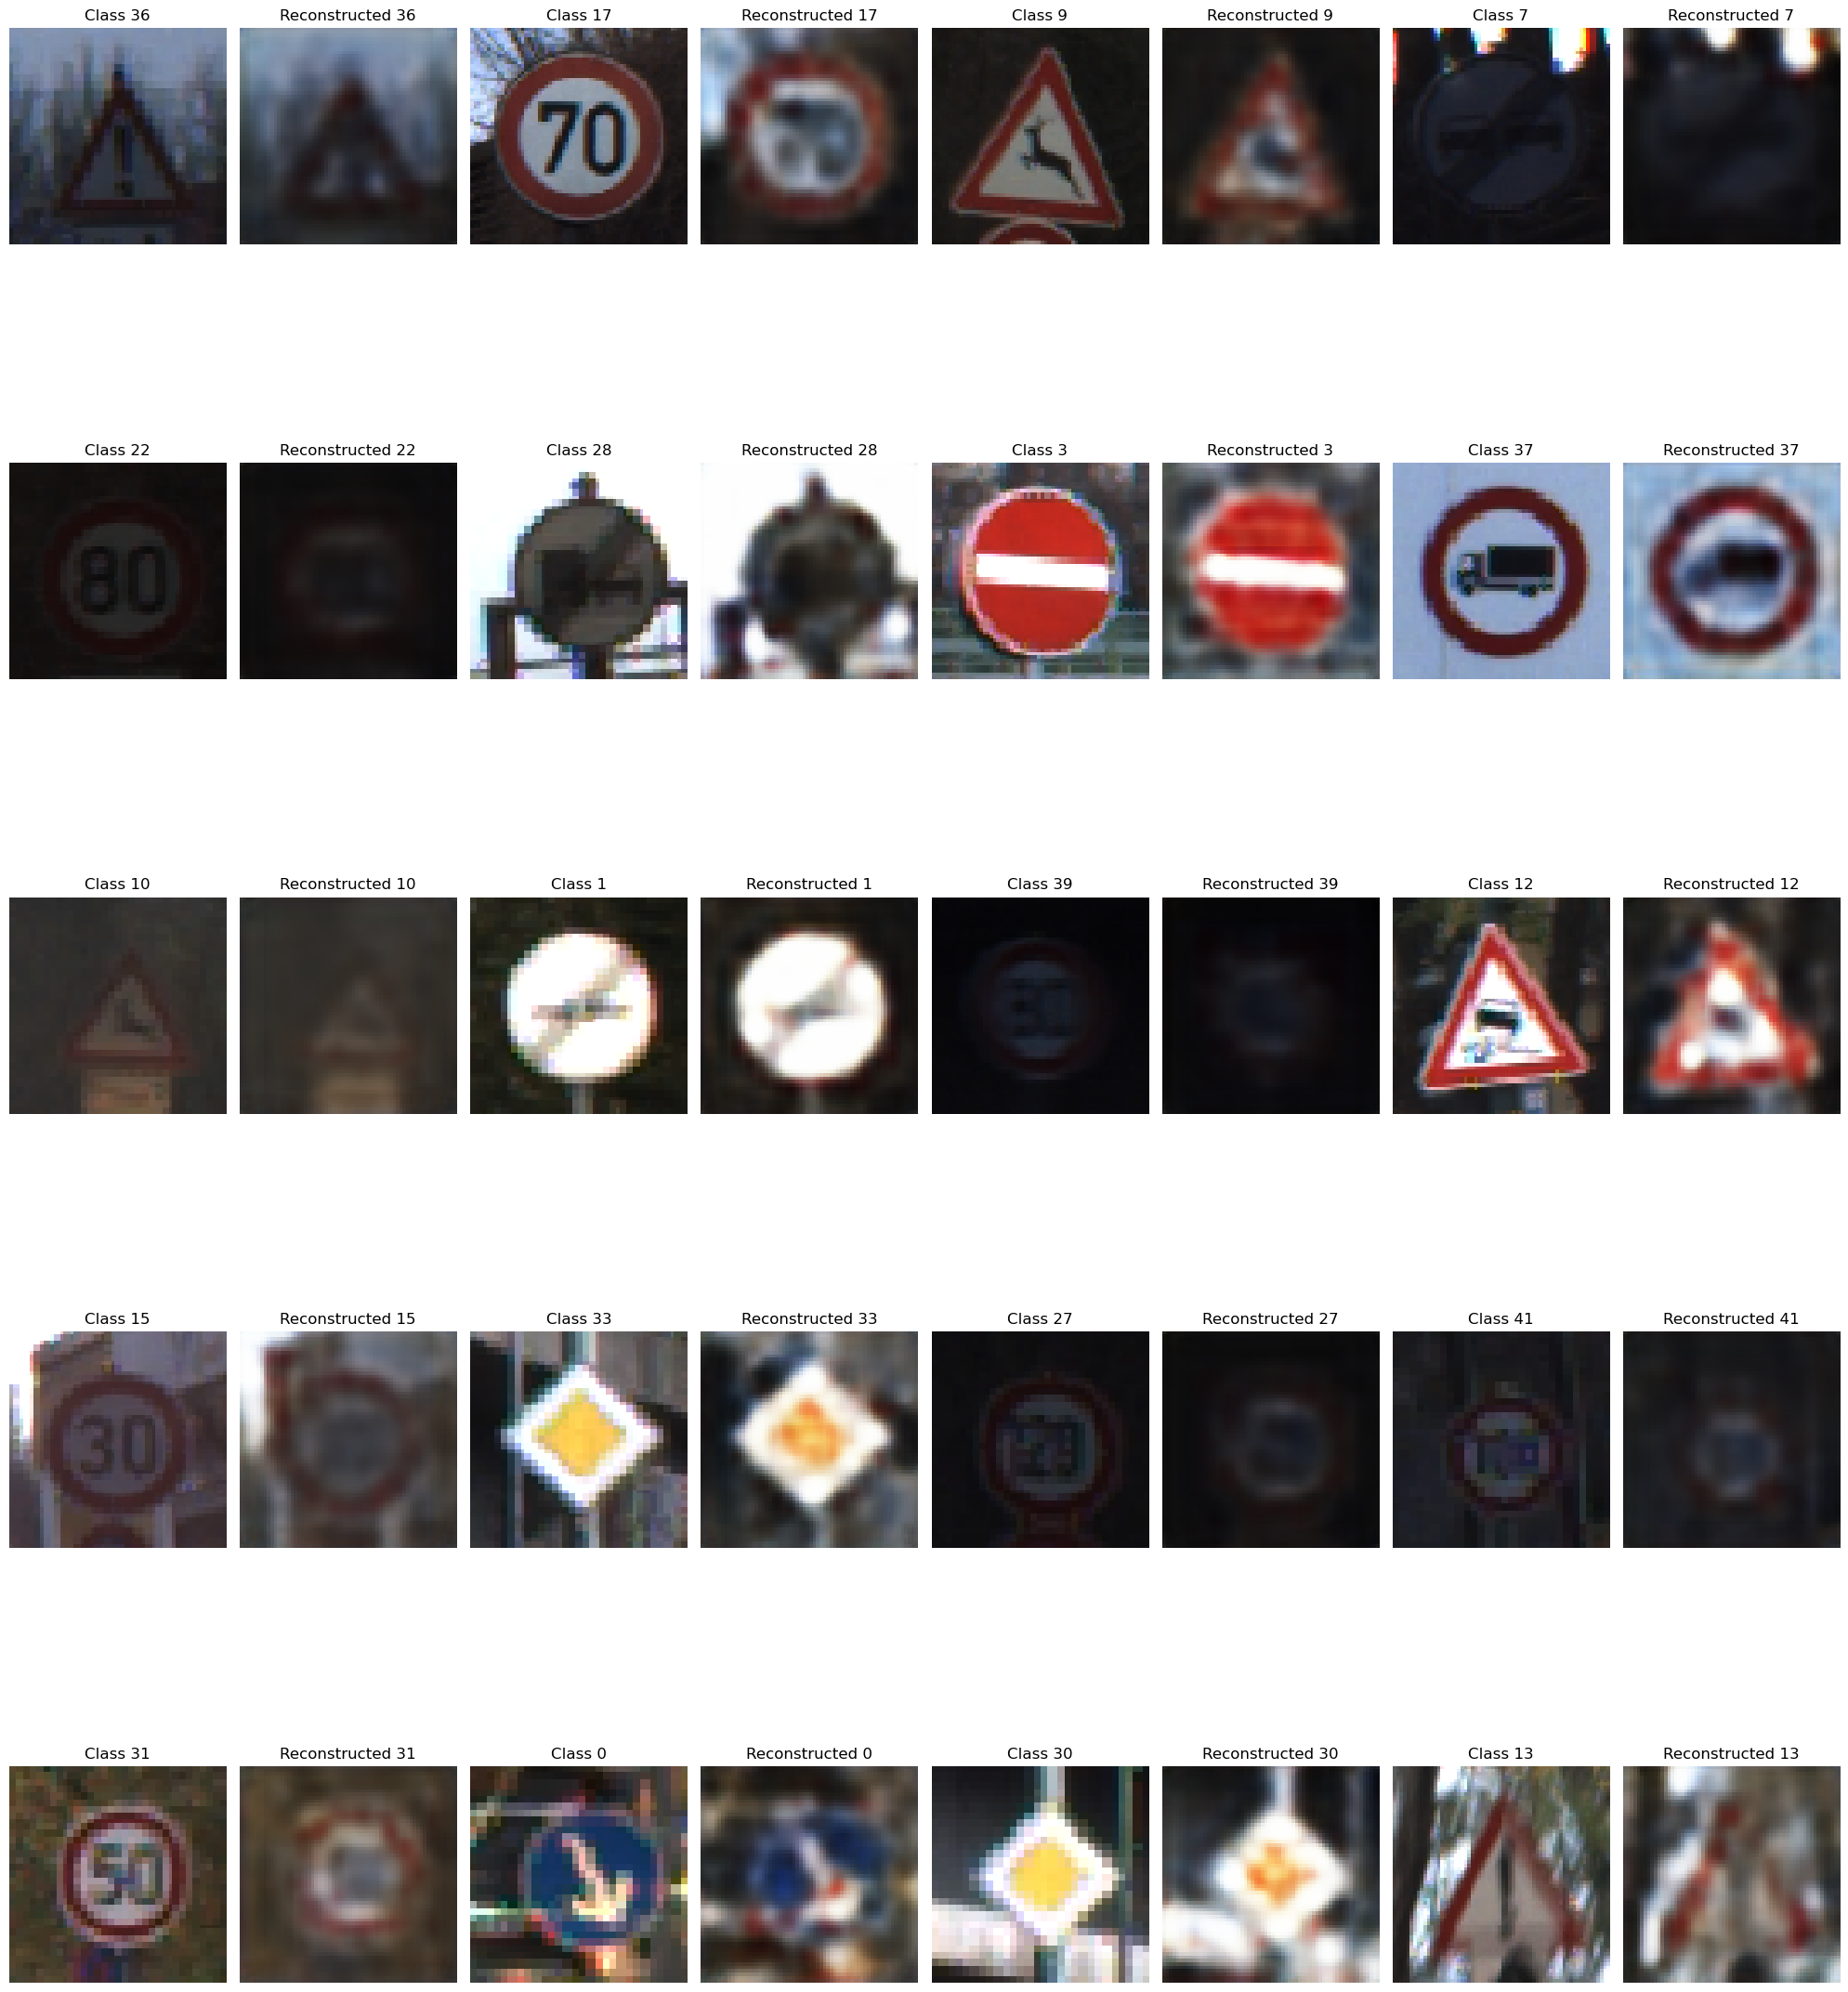

In [10]:
num_classes = len(train_autoencoder_generator.class_indices)

# Randomly select 20 classes
selected_classes = random.sample(range(num_classes), 20)

# Extract one image from each selected class
selected_images_per_class = {}
for i in selected_classes:
    selected_images_per_class[i] = next(train_autoencoder_generator)[0][0]

# Test the autoencoder model by reconstructing the selected images
selected_reconstructed_images = autoencoder.predict(np.array([image for image in selected_images_per_class.values()]))

# Display the original and reconstructed images
plt.figure(figsize=(20, 25))
for i, class_idx in enumerate(selected_classes):
    # Original images
    plt.subplot(5, 8, 2*i + 1)
    plt.imshow(selected_images_per_class[class_idx])
    plt.title(f'Class {class_idx}')
    plt.axis('off')
    
    # Reconstructed images
    plt.subplot(5, 8, 2*i + 2)  
    plt.imshow(selected_reconstructed_images[i])
    plt.title(f'Reconstructed {class_idx}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Now I am going to extract the features from the autoencoder to build a CNN model on them for the classification purpose.

In [11]:
# Build the CNN on top of the trained encoder
encoder = Model(input_img, encoded)

cnn = Sequential()
cnn.add(encoder)
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(43, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the CNN
history_cnn = cnn.fit(
    train_cnn_generator,
    steps_per_epoch=train_cnn_generator.samples // train_cnn_generator.batch_size,
    epochs=100,
    validation_data=validation_cnn_generator,
    validation_steps=validation_cnn_generator.samples // validation_cnn_generator.batch_size,
)

Epoch 1/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.3944 - loss: 2.0953 - val_accuracy: 0.7679 - val_loss: 0.8372
Epoch 2/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.8438 - loss: 0.2742 - val_accuracy: 1.0000 - val_loss: 7.6889e-06
Epoch 3/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8395 - loss: 0.4927

2024-05-02 14:39:48.856049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/sunilinus/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-02 14:39:48.871089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9121 - loss: 0.2773 - val_accuracy: 0.8094 - val_loss: 0.6814
Epoch 4/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.8438 - loss: 0.1576 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 5/100
  5/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9765 - loss: 0.1155 

2024-05-02 14:40:03.722307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:40:03.730095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9591 - loss: 0.1315 - val_accuracy: 0.8010 - val_loss: 0.8056
Epoch 6/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.9375 - loss: 0.2097 - val_accuracy: 1.0000 - val_loss: 2.3842e-07
Epoch 7/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9317 - loss: 0.1740

2024-05-02 14:40:18.502527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:40:18.506200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9718 - loss: 0.0882 - val_accuracy: 0.8050 - val_loss: 0.8677
Epoch 8/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.9375 - loss: 0.2281 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9332 - loss: 0.2095

2024-05-02 14:40:33.744180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:40:33.747276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9731 - loss: 0.0855 - val_accuracy: 0.8290 - val_loss: 0.8207
Epoch 10/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 11/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9927 - loss: 0.0245

2024-05-02 14:40:48.434632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:40:48.438644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9839 - loss: 0.0526 - val_accuracy: 0.8455 - val_loss: 0.7519
Epoch 12/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.9375 - loss: 0.0708 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 13/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9907 - loss: 0.0371

2024-05-02 14:41:03.274610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:41:03.278482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9848 - loss: 0.0516 - val_accuracy: 0.8605 - val_loss: 0.7035
Epoch 14/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.9688 - loss: 0.0221 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 15/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9905 - loss: 0.0295

2024-05-02 14:41:18.053224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:41:18.056515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9877 - loss: 0.0401 - val_accuracy: 0.8523 - val_loss: 0.9443
Epoch 16/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.9062 - loss: 0.1056 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 17/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9885 - loss: 0.0430

2024-05-02 14:41:32.847115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:41:32.850407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9866 - loss: 0.0413 - val_accuracy: 0.8722 - val_loss: 0.6806
Epoch 18/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.9688 - loss: 0.0325 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 19/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9942 - loss: 0.0150

2024-05-02 14:41:47.706526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:41:47.709849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9904 - loss: 0.0328 - val_accuracy: 0.8677 - val_loss: 0.7612
Epoch 20/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 2.5311e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 21/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9973 - loss: 0.0061

2024-05-02 14:42:02.576564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:42:02.579274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9913 - loss: 0.0284 - val_accuracy: 0.8656 - val_loss: 0.7356
Epoch 22/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 23/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9957 - loss: 0.0166   

2024-05-02 14:42:17.280388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:42:17.282674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9907 - loss: 0.0307 - val_accuracy: 0.8621 - val_loss: 0.7619
Epoch 24/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 9.6888e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 25/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9827 - loss: 0.0240  

2024-05-02 14:42:32.435418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:42:32.439118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9923 - loss: 0.0306 - val_accuracy: 0.8570 - val_loss: 0.7144
Epoch 26/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 27/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9968 - loss: 0.0143

2024-05-02 14:42:47.188708: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:42:47.191152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9927 - loss: 0.0258 - val_accuracy: 0.8621 - val_loss: 0.9188
Epoch 28/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 7.6736e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 29/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9987 - loss: 0.0013    

2024-05-02 14:43:02.135531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:43:02.138054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.8699 - val_loss: 0.7689
Epoch 30/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 5.9653e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 31/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 1.0000 - loss: 0.0022

2024-05-02 14:43:16.990184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:43:16.993015: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9942 - loss: 0.0196 - val_accuracy: 0.8603 - val_loss: 0.7235
Epoch 32/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 1.0000 - loss: 1.7602e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 33/100
  8/980 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 1.0000 - loss: 0.0057   

2024-05-02 14:43:31.786423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:43:31.790132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9960 - loss: 0.0140 - val_accuracy: 0.8696 - val_loss: 0.7465
Epoch 34/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 35/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9910 - loss: 0.0317

2024-05-02 14:43:46.626343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:43:46.629144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9920 - loss: 0.0270 - val_accuracy: 0.8593 - val_loss: 0.8074
Epoch 36/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 37/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9943 - loss: 0.0275

2024-05-02 14:44:01.344393: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:44:01.347300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9921 - loss: 0.0270 - val_accuracy: 0.8728 - val_loss: 0.7664
Epoch 38/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.9688 - loss: 0.2901 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 39/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9981 - loss: 0.0062

2024-05-02 14:44:16.313710: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:44:16.316600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9963 - loss: 0.0136 - val_accuracy: 0.8673 - val_loss: 0.8874
Epoch 40/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.9688 - loss: 0.0296 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 41/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 1.0000 - loss: 0.0069

2024-05-02 14:44:31.495878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:44:31.498805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9951 - loss: 0.0173 - val_accuracy: 0.8584 - val_loss: 0.8946
Epoch 42/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 1.3445e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 43/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9933 - loss: 0.0326  

2024-05-02 14:44:46.088188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:44:46.090852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9944 - loss: 0.0184 - val_accuracy: 0.8700 - val_loss: 0.7559
Epoch 44/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 45/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9859 - loss: 0.0581

2024-05-02 14:45:00.833253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:45:00.835815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9928 - loss: 0.0269 - val_accuracy: 0.8492 - val_loss: 1.0372
Epoch 46/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 1.0195e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 47/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9946 - loss: 0.0430

2024-05-02 14:45:15.497921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:45:15.501115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9941 - loss: 0.0238 - val_accuracy: 0.8712 - val_loss: 0.8358
Epoch 48/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 4.6091e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 49/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9968 - loss: 0.0602  

2024-05-02 14:45:30.224674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:45:30.227521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9942 - loss: 0.0252 - val_accuracy: 0.8591 - val_loss: 1.2283
Epoch 50/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 2.4896e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 51/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9902 - loss: 0.0381

2024-05-02 14:45:45.021957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:45:45.024831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9933 - loss: 0.0241 - val_accuracy: 0.8571 - val_loss: 1.0219
Epoch 52/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 3.9503e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 53/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9936 - loss: 0.0072  

2024-05-02 14:46:00.030225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:46:00.033050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9974 - loss: 0.0079 - val_accuracy: 0.8705 - val_loss: 1.0607
Epoch 54/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 55/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9974 - loss: 0.0168  

2024-05-02 14:46:14.915125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:46:14.917296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9930 - loss: 0.0267 - val_accuracy: 0.8577 - val_loss: 1.1232
Epoch 56/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 57/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9936 - loss: 0.1366

2024-05-02 14:46:30.105403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:46:30.107868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9943 - loss: 0.0268 - val_accuracy: 0.8598 - val_loss: 1.0392
Epoch 58/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 7.4625e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 59/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9954 - loss: 0.0177

2024-05-02 14:46:44.717062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:46:44.720060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9949 - loss: 0.0193 - val_accuracy: 0.8783 - val_loss: 1.0169
Epoch 60/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 3.2363e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 61/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9996 - loss: 0.0091  

2024-05-02 14:46:59.311076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:46:59.314152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.8601 - val_loss: 1.0974
Epoch 62/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 1.8119e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 63/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9830 - loss: 0.0340

2024-05-02 14:47:13.929430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:47:13.932920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9957 - loss: 0.0164 - val_accuracy: 0.8768 - val_loss: 0.8785
Epoch 64/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 8.2641e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 65/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9987 - loss: 0.0068  

2024-05-02 14:47:28.682253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:47:28.684484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9941 - loss: 0.0271 - val_accuracy: 0.8784 - val_loss: 0.9210
Epoch 66/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 6.9709e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 67/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 1.0000 - loss: 5.3166e-04

2024-05-02 14:47:43.462036: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:47:43.464500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9986 - loss: 0.0056 - val_accuracy: 0.8786 - val_loss: 0.9057
Epoch 68/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 2.9061e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 69/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 1.0000 - loss: 7.0519e-04

2024-05-02 14:47:58.484841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:47:58.487581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9950 - loss: 0.0196 - val_accuracy: 0.8566 - val_loss: 1.2662
Epoch 70/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 7.3571e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 71/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9859 - loss: 0.0281

2024-05-02 14:48:13.206626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:48:13.209375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9947 - loss: 0.0192 - val_accuracy: 0.8667 - val_loss: 1.0339
Epoch 72/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 73/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9867 - loss: 0.0320

2024-05-02 14:48:27.961038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:48:27.963331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9937 - loss: 0.0238 - val_accuracy: 0.8838 - val_loss: 1.0085
Epoch 74/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 1.4172e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 75/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9954 - loss: 0.0314  

2024-05-02 14:48:42.633144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:48:42.636794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9979 - loss: 0.0090 - val_accuracy: 0.8708 - val_loss: 1.0459
Epoch 76/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 7.1789e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 77/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9902 - loss: 0.0110

2024-05-02 14:48:57.315716: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:48:57.318970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9961 - loss: 0.0158 - val_accuracy: 0.8429 - val_loss: 1.6259
Epoch 78/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 2.8929e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 79/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9823 - loss: 0.2244

2024-05-02 14:49:11.932081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:49:11.934758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9934 - loss: 0.0307 - val_accuracy: 0.8744 - val_loss: 1.1494
Epoch 80/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 2.0896e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 81/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9933 - loss: 0.0100  

2024-05-02 14:49:26.589194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:49:26.591988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9956 - loss: 0.0198 - val_accuracy: 0.8614 - val_loss: 1.1302
Epoch 82/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 1.1014e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 83/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9954 - loss: 0.0137

2024-05-02 14:49:41.315122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:49:41.318167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9946 - loss: 0.0215 - val_accuracy: 0.8902 - val_loss: 0.9130
Epoch 84/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 85/100
  8/980 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9983 - loss: 0.0054    

2024-05-02 14:49:55.902194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:49:55.905507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9977 - loss: 0.0102 - val_accuracy: 0.8885 - val_loss: 1.0221
Epoch 86/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 1.0000 - loss: 5.0636e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 87/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9996 - loss: 9.9297e-04

2024-05-02 14:50:10.392309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:50:10.396414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9963 - loss: 0.0152 - val_accuracy: 0.8782 - val_loss: 1.0539
Epoch 88/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 6.2648e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 89/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 1.0000 - loss: 2.5440e-04

2024-05-02 14:50:25.528460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:50:25.531385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9964 - loss: 0.0165 - val_accuracy: 0.8598 - val_loss: 1.4290
Epoch 90/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 2.6707e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 91/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9996 - loss: 0.0078

2024-05-02 14:50:40.007875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:50:40.010768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9953 - loss: 0.0190 - val_accuracy: 0.8878 - val_loss: 0.8564
Epoch 92/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 2.4906e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 93/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 1.0000 - loss: 0.0014

2024-05-02 14:50:54.484057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:50:54.487532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9983 - loss: 0.0093 - val_accuracy: 0.8458 - val_loss: 1.3131
Epoch 94/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 1.8052e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 95/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9974 - loss: 0.0038

2024-05-02 14:51:09.140559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:51:09.144214: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9973 - loss: 0.0118 - val_accuracy: 0.8620 - val_loss: 1.3472
Epoch 96/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 7.6658e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 97/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 1.0000 - loss: 0.0030

2024-05-02 14:51:23.767879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:51:23.771288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9950 - loss: 0.0311 - val_accuracy: 0.8853 - val_loss: 1.1310
Epoch 98/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 3.7104e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 99/100
  9/980 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 1.0000 - loss: 7.6524e-04

2024-05-02 14:51:38.388656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:51:38.391489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


980/980 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9974 - loss: 0.0106 - val_accuracy: 0.8798 - val_loss: 1.3207
Epoch 100/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 5.9744e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


2024-05-02 14:51:53.169155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 14:51:53.171890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


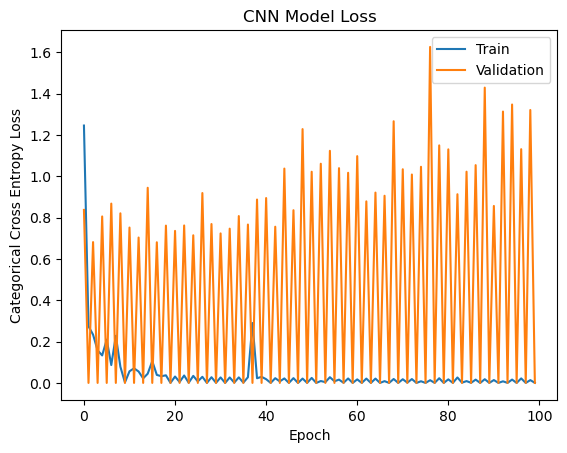

In [13]:
# Plot training and validation loss scores against the number of epochs
plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('CNN Model Loss')
plt.legend(loc='upper right')
plt.show()

#### Based on the above visualization, it appears that the model's performance stabilized around epoch 20, as there is minimal improvement in both validation loss and validation accuracy beyond this point.

In the below cell, a test data generator is being set up which will be used to load and preprocess images for testing the trained model.

#### Generating predictions for each batch of test data to evaluate the performance of the model on the test dataset.

In [14]:
# Generate predictions for the test data
predictions = cnn.predict(validation_cnn_generator)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [15]:
# Get the true labels for the test data
true_labels = validation_cnn_generator.classes

In [16]:
# Convert the predictions from one-hot encoded to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [17]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 97   5   0 ...   0   0   0]
 [  2  20   5 ...   0   9   0]
 [  0   0 221 ...   0   0   0]
 ...
 [  0   0   0 ...  79   0   0]
 [  0   0   0 ...   0 150   0]
 [  0   0   0 ...   0   0 418]]


In [18]:
# Generate the classification report
class_report = classification_report(true_labels, predicted_labels)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       108
           1       0.74      0.37      0.49        54
           2       0.93      1.00      0.96       222
           3       0.53      0.38      0.44        48
           4       0.86      1.00      0.92        48
           5       0.95      0.85      0.90        48
           6       0.94      0.95      0.95        84
           7       0.84      0.97      0.91       240
           8       0.90      1.00      0.95        84
           9       0.73      0.86      0.79        42
          10       0.86      0.86      0.86        66
          11       0.94      0.55      0.70       288
          12       0.71      0.95      0.81       282
          13       0.88      0.71      0.79        42
          14       0.91      0.80      0.85       444
          15       0.87      0.87      0.87       450
          16       0.67      0.93      0.77       282
  

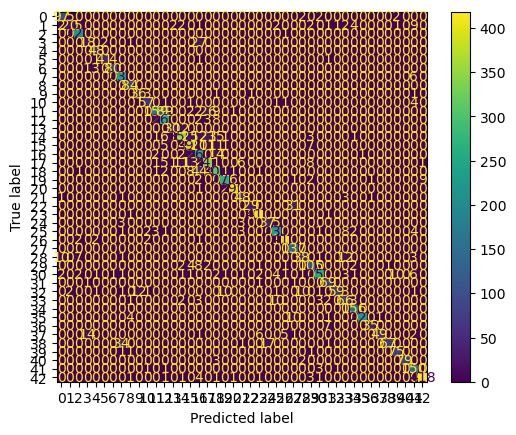

In [19]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(43))
disp.plot()
plt.show()

### Now that we have built the CNN model, let us see how well it is performing in classifying a traffic sign.

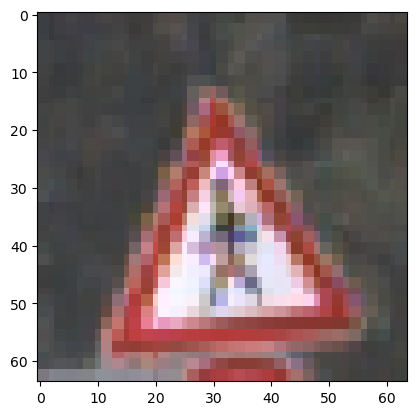

In [20]:
img_path = "/Users/sunilinus/Desktop/DSP/Project/GTSRB/Final_Training/Images/pedestrian/00002_00008.ppm"

# Load and resize the image
img = load_img(img_path, color_mode='rgb', target_size=(64, 64))

# Display the image
plt.imshow(img)
plt.show()

In [21]:
# Convert the image to an array
single_image = img_to_array(img)

# Normalize the image
img_rank4 = np.expand_dims(single_image/255, axis=0)

# Generate prediction using our model
cnn.predict(img_rank4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[4.2166786e-17, 6.3197866e-22, 5.8053205e-28, 9.6437634e-23,
        1.0664220e-28, 4.3106427e-36, 0.0000000e+00, 4.3519786e-15,
        1.8223143e-26, 2.4700914e-22, 3.6008042e-25, 2.4008155e-23,
        1.2829176e-17, 7.4147997e-32, 5.3514727e-23, 2.8138554e-26,
        7.6472684e-28, 2.3354309e-18, 2.4776707e-21, 2.1342127e-24,
        4.1346662e-38, 1.6551781e-14, 1.7298697e-15, 5.7952738e-21,
        1.0000000e+00, 5.8976571e-15, 2.4777256e-30, 1.9990966e-23,
        3.4180754e-20, 4.5832205e-26, 8.1217590e-16, 2.3737533e-13,
        1.4149785e-23, 1.6485590e-21, 0.0000000e+00, 3.6676209e-34,
        1.1740955e-18, 6.1346630e-34, 3.3606112e-17, 2.4572680e-18,
        7.6540296e-23, 3.6994776e-18, 5.6655645e-28]], dtype=float32)

In [22]:
#since the output above is difficult to read, let's round
np.round(cnn.predict(img_rank4),2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
# Now, we need to find the index where the prediction array is 1
np.argmax(cnn.predict(img_rank4), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([24])

In [24]:
# To get the label, we need to get the class indices from the training generator
label_map = (train_cnn_generator.class_indices)
label_map

{'children': 0,
 'cycle': 1,
 'do_not_enter': 2,
 'end_of_all_restrictions': 3,
 'end_of_no_passing_zone': 4,
 'end_of_no_passing_zone_for_trucks': 5,
 'end_speed_limit_80': 6,
 'general_danger': 7,
 'left_ahead': 8,
 'left_curve': 9,
 'left_double_curve': 10,
 'maximum_speed limit_100': 11,
 'maximum_speed limit_120': 12,
 'maximum_speed limit_20': 13,
 'maximum_speed limit_30': 14,
 'maximum_speed limit_50': 15,
 'maximum_speed limit_60': 16,
 'maximum_speed limit_70': 17,
 'maximum_speed limit_80': 18,
 'no_passing': 19,
 'no_passing_for_vehicles_over_3.5_tonnes': 20,
 'one_sided_road_narrowing_(right)': 21,
 'pass_on_the_left': 22,
 'pass_on_the_right': 23,
 'pedestrian': 24,
 'priority': 25,
 'priority_road': 26,
 'right_ahead': 27,
 'right_curve': 28,
 'road_closed': 29,
 'roadworks': 30,
 'roundabout': 31,
 'slipperiness': 32,
 'slipperiness_due_to_snow_or_ice': 33,
 'stop': 34,
 'straight_ahead': 35,
 'straight_ahead _or_left_ahead': 36,
 'straight_ahead_or_right_ahead': 37,
 '

In [25]:
# Now, we can use our prediction and get the class label from the class indices:
list(label_map.keys())[np.argmax(cnn.predict(img_rank4), axis=-1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


'pedestrian'

### Analysis will be discussed in the report